In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
from datetime import datetime

### This notebook's purpose is to divide the harvey dataset into days and run an analysis for most common words by tweets

In [2]:
harvey_df = pd.read_csv('Hurricane_Harvey - Kaggle.csv', encoding="ISO-8859-1")

In [3]:
harvey_df.dtypes

Unnamed: 0    float64
ID            float64
Likes         float64
Replies       float64
Retweets      float64
Time           object
Tweet          object
dtype: object

In [5]:
harvey_df.isna().sum()

Unnamed: 0    472
ID            472
Likes         539
Replies       539
Retweets      539
Time          472
Tweet         490
dtype: int64

In [6]:
harvey_df.dropna(inplace=True)

In [7]:
harvey_df['Tweet'] = harvey_df['Tweet'].map(lambda x: x.lower())
harvey_df['Tweet'] = harvey_df['Tweet'].map(lambda x: re.sub('\s[\/]?r\/[^s]+', ' ', x))
harvey_df['Tweet'] = harvey_df['Tweet'].map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', x))
harvey_df['Tweet'] = harvey_df['Tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [8]:
harvey_df['Time'] = pd.to_datetime(harvey_df['Time'])

In [9]:
harvey_df.dtypes

Unnamed: 0           float64
ID                   float64
Likes                float64
Replies              float64
Retweets             float64
Time          datetime64[ns]
Tweet                 object
dtype: object

In [10]:
harvey_df

,Unnamed: 0,ID,Likes,Replies,Retweets,Time,Tweet
0,0.0,9.010000e+17,3.0,0.0,0.0,2017-08-25 14:44:00,if you do decide to drive in for #coldplayhous...
1,1.0,9.010000e+17,0.0,0.0,0.0,2017-08-25 14:44:00,"as hurricane harvey is fast approaching, now i..."
2,2.0,9.010000e+17,6.0,0.0,1.0,2017-08-25 14:44:00,is @jerryjordan_ktt providing live #hurricaneh...
3,3.0,9.010000e+17,0.0,0.0,0.0,2017-08-25 14:44:00,im waiting for a steve harvey hurricane meme
4,4.0,9.010000e+17,0.0,0.0,0.0,2017-08-25 14:44:00,the name of the hurricane is harvey ... steve ...
...,...,...,...,...,...,...,...
399401,224353.0,9.030000e+17,0.0,0.0,0.0,2017-08-29 13:56:00,lawyers wanting to provide pro bono help in th...
399402,224354.0,9.030000e+17,0.0,0.0,0.0,2017-08-29 13:56:00,hurricane harvey: alabamas largest church alre...
399403,224355.0,9.030000e+17,0.0,0.0,0.0,2017-08-29 13:56:00,hurricane harvey pressures already tight houst...
399404,224356.0,9.030000e+17,0.0,0.0,0.0,2017-08-29 13:57:00,our thoughts are with our neighbors in the sou...


In [11]:
harvey_df['Time'] = harvey_df['Time'].dt.date

In [12]:
harvey_df.dtypes

Unnamed: 0    float64
ID            float64
Likes         float64
Replies       float64
Retweets      float64
Time           object
Tweet          object
dtype: object

In [13]:
harvey_df['Time'] = pd.to_datetime(harvey_df['Time'])

In [14]:
harvey_df.dtypes

Unnamed: 0           float64
ID                   float64
Likes                float64
Replies              float64
Retweets             float64
Time          datetime64[ns]
Tweet                 object
dtype: object

In [15]:
day1_df = harvey_df[harvey_df['Time'] == "2017-08-25"]

In [16]:
day2_df =harvey_df[harvey_df['Time'] == "2017-08-26"]

In [17]:
day3_df =harvey_df[harvey_df['Time'] == "2017-08-27"]

In [18]:
day4_df =harvey_df[harvey_df['Time'] == "2017-08-28"]

In [19]:
day5_df =harvey_df[harvey_df['Time'] == "2017-08-29"]

In [20]:
X_day1 = day1_df['Tweet']

In [21]:
X_day2 = day2_df['Tweet']
X_day3 = day3_df['Tweet']
X_day4 = day4_df['Tweet']
X_day5 = day5_df['Tweet']


In [22]:
cvec = CountVectorizer(stop_words='english', min_df=2, ngram_range = (1,3), max_features=1500)

In [23]:
data_features_day1 = pd.DataFrame(cvec.fit_transform(X_day1).todense(), 
                             columns=cvec.get_feature_names())

data_features_day2 = pd.DataFrame(cvec.fit_transform(X_day2).todense(), 
                             columns=cvec.get_feature_names())

data_features_day3 = pd.DataFrame(cvec.fit_transform(X_day3).todense(), 
                             columns=cvec.get_feature_names())

data_features_day4 = pd.DataFrame(cvec.fit_transform(X_day4).todense(), 
                             columns=cvec.get_feature_names())

data_features_day5 = pd.DataFrame(cvec.fit_transform(X_day5).todense(), 
                             columns=cvec.get_feature_names())

#create list 
words_day1 = data_features_day1.sum().sort_values(ascending=False).head(1000).index
words_day2 = data_features_day2.sum().sort_values(ascending=False).head(1000).index
words_day3 = data_features_day3.sum().sort_values(ascending=False).head(1000).index
words_day4 = data_features_day4.sum().sort_values(ascending=False).head(1000).index
words_day5 = data_features_day5.sum().sort_values(ascending=False).head(1000).index

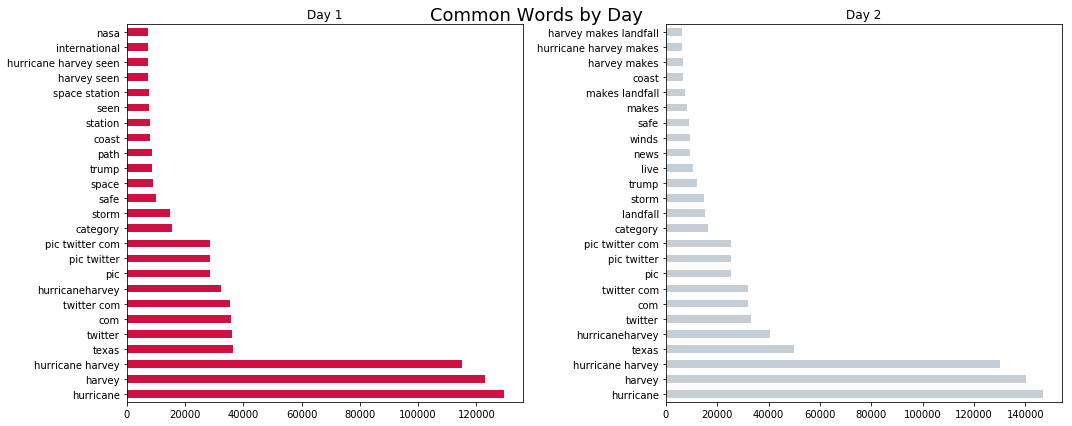

In [34]:
#took the common words and applied them to city specific sub-dataframes of the countvectorized data_features 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 6))

data_features_day1.loc[:, words_day1[:25]].sum().plot.barh(ax = ax1, title = 'Day 1', color = '#CE1141'),

data_features_day2.loc[:, words_day2[:25]].sum().plot.barh(ax = ax2, title = 'Day 2', color = '#C4CED4'),

fig.suptitle('Common Words by Day', fontsize=18)
plt.tight_layout();

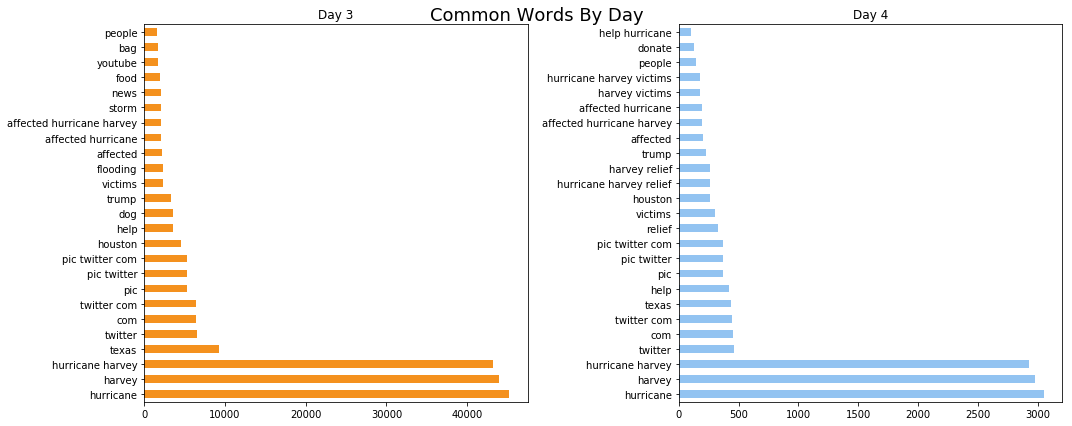

In [28]:
##took the common words and applied them to city specific sub-dataframes of the countvectorized data_features 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 6))

data_features_day3.loc[:, words_day3[:25]].sum().plot.barh(ax = ax1, title = 'Day 3', color = '#f4911e'),

data_features_day4.loc[:, words_day4[:25]].sum().plot.barh(ax = ax2, title = 'Day 4', color = '#92c3f1'),

fig.suptitle('Common Words By Day', fontsize=18)
plt.tight_layout();

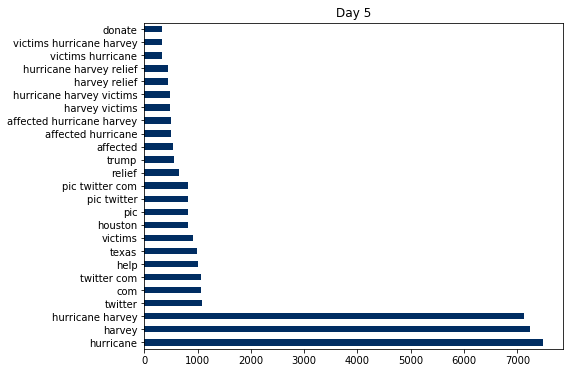

In [29]:
fig, (ax1) = plt.subplots(ncols=1, figsize = (7.5, 6))


data_features_day5.loc[:, words_day5[:25]].sum().plot.barh(ax = ax1, title = 'Day 5', color = '#002D62');